In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow version 1.13.1
Pandas version 0.24.2
Numpy version 1.16.2


In [3]:
# Function to model
# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)
# Shuffle the sample
np.random.shuffle(pool)
# sample size of 15%
sample = int(1000 * 0.15)
# 15% test
test_x = pool[0:sample]
# 85% training
train_x = pool[sample:]
print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))
# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [5]:
df = pd.DataFrame({'x':train_x[:,0], 'y':train_y[:,0]})
df.head()

,x,y
0,0.394440,6.494484
1,0.133082,5.434669
2,0.022280,5.067834
3,0.158921,5.527274
4,0.296963,6.067261


In [6]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.501135,7.173580
std,0.289915,1.450583
min,0.001199,5.003599
25%,0.270532,5.957970
50%,0.500681,7.003406
75%,0.755381,8.407343
max,0.999048,9.993340


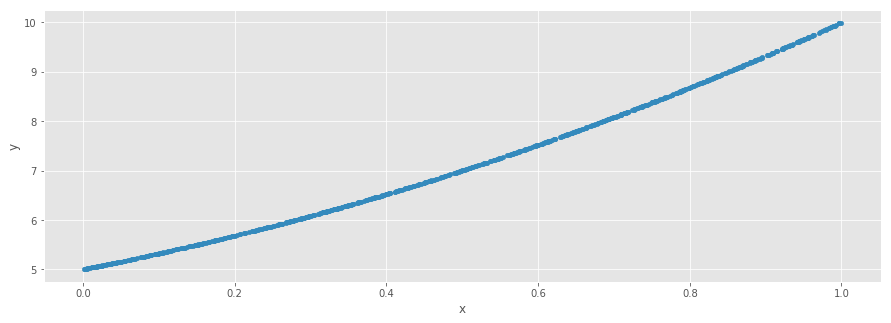

In [7]:
df.plot.scatter(x='x',y='y',figsize=(15,5))

In [16]:
# Helper Functions
def add_layer(inputs, in_size, out_size, activation_function=None):
    # tf.random_normal([what is the size of your batches, size of output layer])
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size], mean=0.1, stddev=0.1))
    # tf.random_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([out_size], mean=0.1, stddev=0.1))
    # shape of pred = [size of your batches, size of output layer]
    pred = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = pred # Linear
    else:
        outputs = activation_function(pred) # Non-linear
    return outputs

In [17]:
# you can adjust the number of neurons in the hidden layers here
hidden_size = 100
# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")
print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


In [18]:
# create your hidden layers!
h1 = add_layer(x, 1, hidden_size, tf.nn.relu)
h2 = add_layer(h1, hidden_size, hidden_size, tf.nn.relu)

print("shape of hidden layers:")
print(h1.get_shape(), h2.get_shape())

shape of hidden layers:
(?, 100) (?, 100)


In [20]:
# Output Layers
pred = add_layer(h2, hidden_size, 1)
print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [21]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))
# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.003)
train = optimizer.minimize(loss)

In [22]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# Training Time
# initialize the variables
init = tf.global_variables_initializer()
# hold step and error values
t = []
# Run your graph
with tf.Session() as sess:
    # initialize variables
    sess.run(init)
    # Fit the function.
    for step in range(3000):
        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%200==0:
            # capture the step and error for analysis
            t.append((step, train_loss))    
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
            print("Training loss at step %d: %f" % (step, train_loss))                              
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0], 'pred':test_results[:,0]})
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  


Training loss at step 0: 172.544022
Training loss at step 200: 0.000447
Training loss at step 400: 0.000370
Training loss at step 600: 0.000321
Training loss at step 800: 0.000284
Training loss at step 1000: 0.000254
Training loss at step 1200: 0.000230
Training loss at step 1400: 0.000210
Training loss at step 1600: 0.000192
Training loss at step 1800: 0.000177
Training loss at step 2000: 0.000164
Training loss at step 2200: 0.000152
Training loss at step 2400: 0.000142
Training loss at step 2600: 0.000133
Training loss at step 2800: 0.000125
Accuracy on the Training Set: 0.9952941
Accuracy on the Test Set: 0.9866667


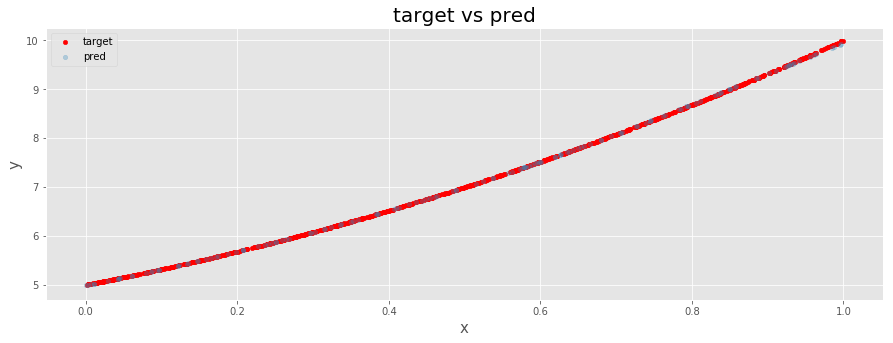

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')
# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)
# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

In [27]:
df_loss
# df_loss.set_index('step').plot(logy=True, figsize=(15,5));

,step,train_loss
0,0,172.544022
1,200,0.000447
2,400,0.000370
3,600,0.000321
4,800,0.000284
5,1000,0.000254
6,1200,0.000230
7,1400,0.000210
8,1600,0.000192
9,1800,0.000177


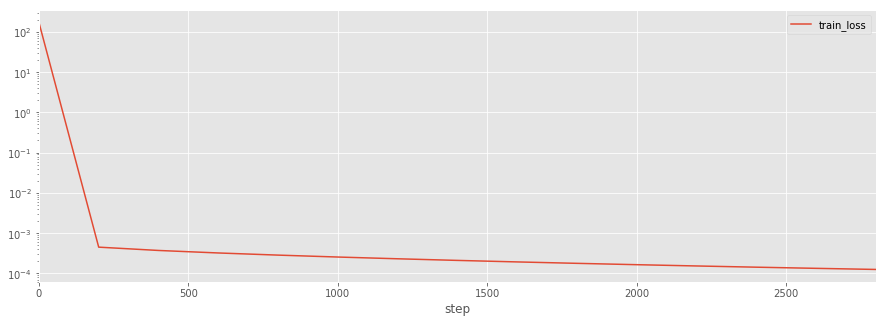

In [28]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));